# Importing Necessary Libraries

In [89]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Reading Dataset

In [90]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

# Performing Basic EDA

In [91]:
df.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Mba %,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,57.80,Placed
3,4,M,NaN,Central,52.00,Central,Science,52.00,Sci&Tech,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,55.50,Placed


In [92]:
df.describe()
# Describes the Dataset

,Sno,10th %,12th %,Degree %,Mba %
count,100.000000,92.000000,94.000000,93.000000,88.000000
mean,50.500000,68.475217,67.147021,66.816882,62.055227
std,29.011492,10.950618,11.622820,7.656330,5.713565
min,1.000000,40.890000,37.000000,50.000000,51.210000
25%,25.750000,61.750000,62.000000,64.000000,57.625000
50%,50.500000,69.000000,67.000000,66.000000,62.410000
75%,75.250000,77.100000,74.750000,72.000000,66.570000
max,100.000000,87.000000,97.700000,85.000000,77.890000


In [93]:
df.info
# Gives information About Dataset

<bound method DataFrame.info of     Sno Gender  10th % SSC Board  12th % HSC Board 12th Stream  Degree %  \
0     1      M   67.00    Others   91.00    Others    Commerce     58.00   
1     2      M   79.33   Central   78.33    Others     Science     77.48   
2     3      M   65.00   Central   68.00   Central        Arts     64.00   
3     4      M     NaN   Central   52.00   Central     Science     52.00   
4     5      M   85.80   Central   73.60   Central    Commerce     73.30   
..  ...    ...     ...       ...     ...       ...         ...       ...   
95   96      M   73.00   Central   78.00    Others    Commerce     65.00   
96   97      F     NaN   Central   70.00   Central     Science     76.00   
97   98      F   70.50   Central   62.50    Others    Commerce     61.00   
98   99      F   69.00   Central     NaN   Central    Commerce     65.00   
99  100      M   54.00   Central   82.00    Others    Commerce       NaN   

   Degree stream  Mba %      status  
0       Sci&Tech 

In [94]:
df.shape
# returns the Dimension of dataset

(100, 11)

In [95]:
df.isnull().sum()
# Checks for the null values in each columm

Sno               0
Gender            0
10th %            8
SSC Board         0
12th %            6
HSC Board         0
12th Stream       0
Degree %          7
Degree stream     0
Mba %            12
status            0
dtype: int64

# replacing Empty values with mean value for that particular column

In [96]:
df['10th %'] = df['10th %'].fillna(df['10th %'].mean())
# Replacces the null values for 10% Column

In [97]:
df['12th %'] = df['12th %'].fillna(df['12th %'].mean())
# Replacces the null values for 12% Column

In [98]:
df['Degree %'] = df['Degree %'].fillna(df['Degree %'].mean())
# Replacces the null values for Degree% Column

In [99]:
df['Mba %'] = df['Mba %'].fillna(df['Mba %'].mean())
# Replacces the null values for MBA% Column

In [100]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# encoding of male femal using label 

In [101]:
df.isnull().sum()
# Checks for the Null Values  

Sno              0
Gender           0
10th %           0
SSC Board        0
12th %           0
HSC Board        0
12th Stream      0
Degree %         0
Degree stream    0
Mba %            0
status           0
dtype: int64

In [102]:
df

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Mba %,status
0,1,1,67.000000,Others,91.000000,Others,Commerce,58.000000,Sci&Tech,58.800000,Placed
1,2,1,79.330000,Central,78.330000,Others,Science,77.480000,Sci&Tech,66.280000,Placed
2,3,1,65.000000,Central,68.000000,Central,Arts,64.000000,Comm&Mgmt,57.800000,Placed
3,4,1,68.475217,Central,52.000000,Central,Science,52.000000,Sci&Tech,59.430000,Not Placed
4,5,1,85.800000,Central,73.600000,Central,Commerce,73.300000,Comm&Mgmt,55.500000,Placed
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,73.000000,Central,78.000000,Others,Commerce,65.000000,Comm&Mgmt,62.160000,Placed
96,97,0,68.475217,Central,70.000000,Central,Science,76.000000,Comm&Mgmt,62.055227,Placed
97,98,0,70.500000,Central,62.500000,Others,Commerce,61.000000,Comm&Mgmt,69.030000,Not Placed
98,99,0,69.000000,Central,67.147021,Central,Commerce,65.000000,Comm&Mgmt,57.310000,Placed


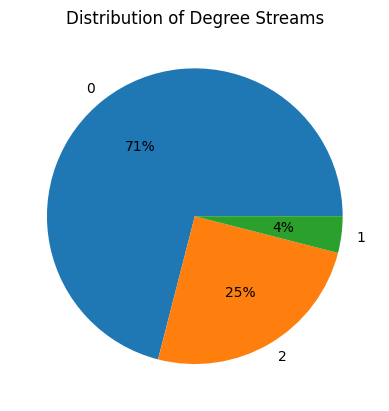

In [133]:
streams = df['Degree stream'].value_counts()
plt.pie(streams, labels=streams.index, autopct=lambda p : '{:.0f}%'.format(p), textprops={'fontsize': 10})
plt.title('Distribution of Degree Streams')
plt.show()

# Categorization Of Column

In [103]:
categorical_columns = []
numerical_columns = []
# empty list for Categorical and Numerical Data

In [104]:
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# appending List with categorization of columns

In [105]:
categorical_columns
# output

['SSC Board', 'HSC Board', '12th Stream', 'Degree stream', 'status']

In [106]:
numerical_columns
#output

['Sno', 'Gender', '10th %', '12th %', 'Degree %', 'Mba %']

# Applying Label Encoder

In [107]:
le = LabelEncoder()
# Label Encode for Gender Column

In [108]:
df['Gender'] = le.fit_transform(df['Gender'])
df['SSC Board'] = le.fit_transform(df['SSC Board'])
df['HSC Board'] = le.fit_transform(df['HSC Board'])
df['12th Stream'] = le.fit_transform(df['12th Stream'])
df['Degree stream'] = le.fit_transform(df['Degree stream'])
# transforming Categorical Data into Numerical Data

# Using Map Function

In [109]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})
# Using maop function to Replace categorical Data of Target Column

In [110]:
df

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Mba %,status
0,1,1,67.000000,1,91.000000,1,1,58.000000,2,58.800000,1
1,2,1,79.330000,0,78.330000,1,2,77.480000,2,66.280000,1
2,3,1,65.000000,0,68.000000,0,0,64.000000,0,57.800000,1
3,4,1,68.475217,0,52.000000,0,2,52.000000,2,59.430000,0
4,5,1,85.800000,0,73.600000,0,1,73.300000,0,55.500000,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,73.000000,0,78.000000,1,1,65.000000,0,62.160000,1
96,97,0,68.475217,0,70.000000,0,2,76.000000,0,62.055227,1
97,98,0,70.500000,0,62.500000,1,1,61.000000,0,69.030000,0
98,99,0,69.000000,0,67.147021,0,1,65.000000,0,57.310000,1


# Feature And Target Selection

In [111]:
X = df.drop(columns=['Sno', 'status'])
y = df['status']
# Feature And Target Selection

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train test split

# Logistic Regression

In [113]:
model = LogisticRegression()
model.fit(X_train, y_train)
# applying Logistic Regression

c:\Users\shubham bhosale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
#Printing Accuracy Score

Accuracy: 0.85


# Ridge Model

In [115]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge:.2f}')
# Applying Ridge Regression 

Ridge Regression Mean Squared Error: 0.13


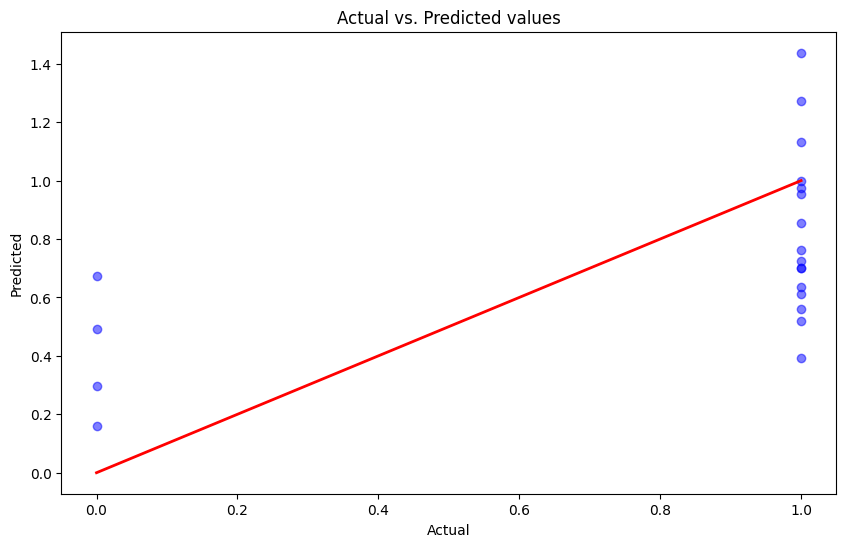

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.show()
# Plotting ridge Diagram

# Lasso Model

In [117]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso:.2f}')
# Applying Lasso Regression


Lasso Regression Mean Squared Error: 0.12


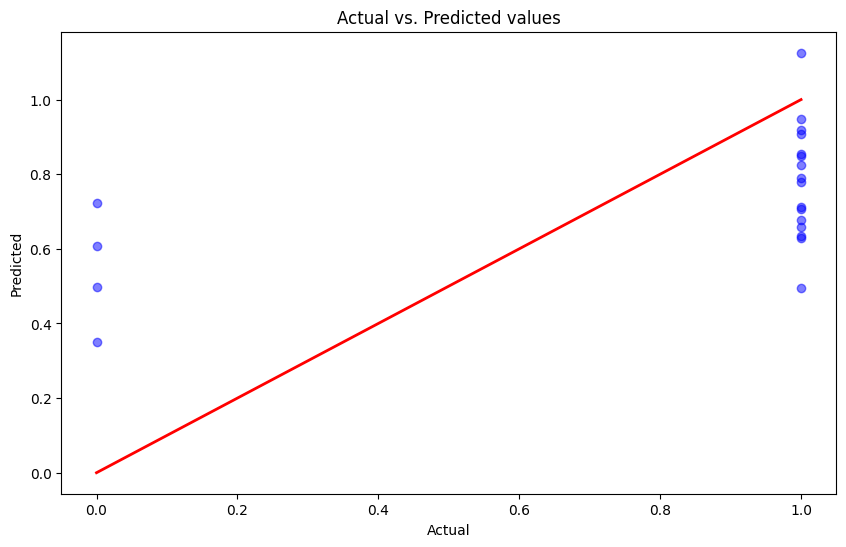

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.show()
# Plotting Lasso Diagram

# Decision Tree Model

In [119]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Classifier Accuracy: {accuracy_tree:.2f}')
# Applying Decision Tree Classifier

Decision Tree Classifier Accuracy: 0.85


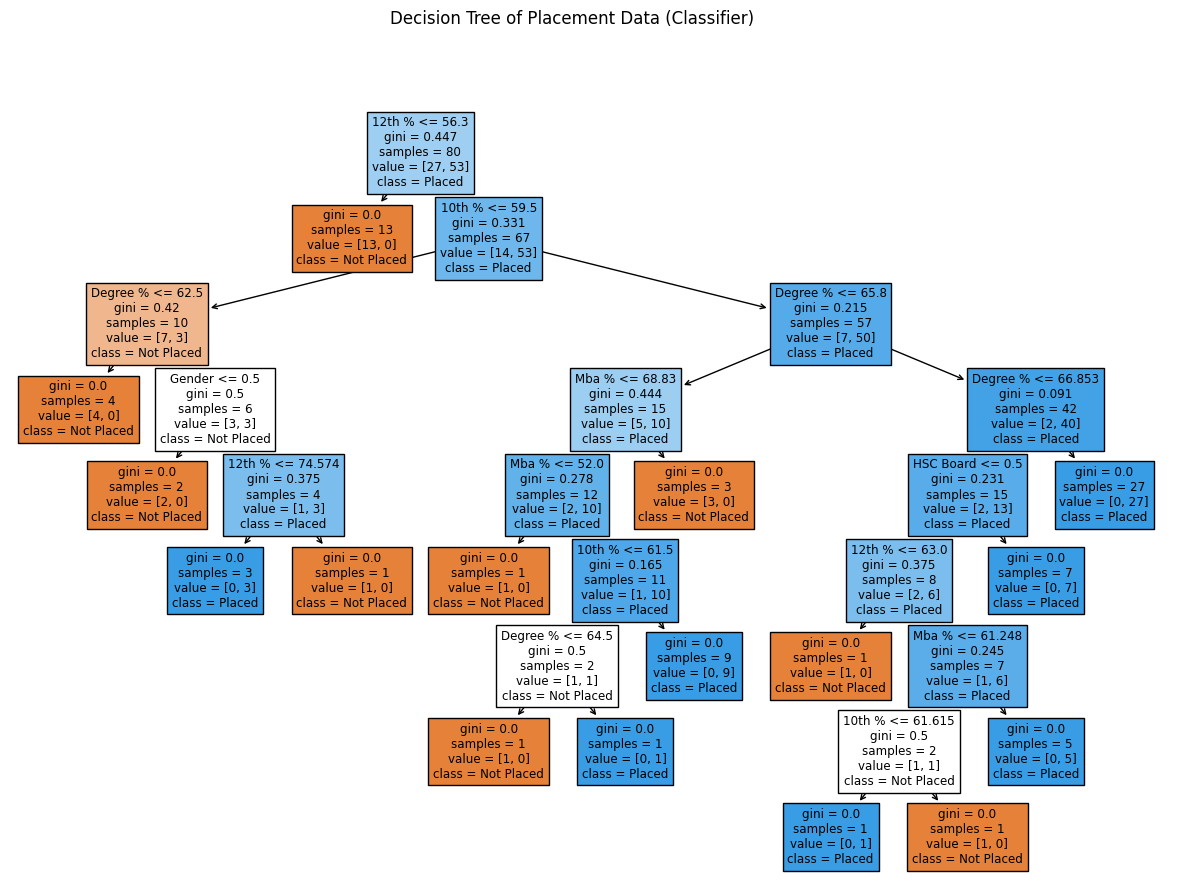

In [123]:
plt.figure(figsize=(15, 10))
plt.suptitle("Decision Tree of Placement Data (Classifier)")
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Placed', 'Placed'])
plt.show()

# Decision Tree Regressor

In [121]:
tree_model_R = DecisionTreeRegressor(random_state=42)
tree_model_R.fit(X_train, y_train)
y_pred_tree = tree_model_R.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Regressor Accuracy: {accuracy_tree:.2f}')
# Applying Decision Tree Classifier

Decision Tree Regressor Accuracy: 0.85


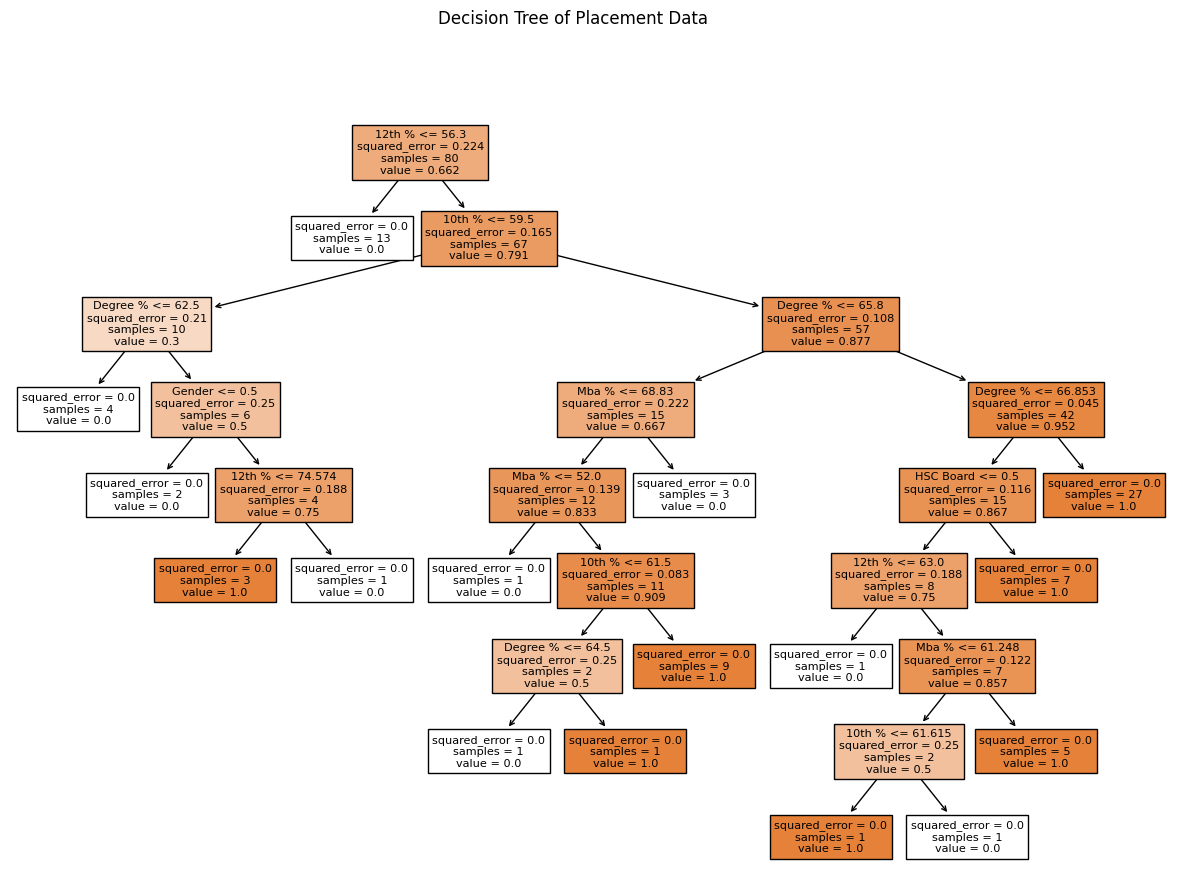

In [122]:
plt.figure(figsize=(15, 10))
plt.suptitle("Decision Tree of Placement Data (Regresssor)")
plot_tree(tree_model_R, filled=True, feature_names=X.columns, class_names=['Not Placed', 'Placed'])
plt.show()